In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns   # for data visualization
from sklearn.model_selection import train_test_split   # for splitting the data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # for preprocessing the data
from sklearn.tree import DecisionTreeClassifier   # Decision Tree Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #for evaluating the model
import joblib

# Classification

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris() 
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [6]:
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [8]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df['target_name'] = data.target_names[data.target]  # add a new column with the target_name
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
x_multiclass = df.drop(['target_name', 'target'], axis=1)  # drop the target_name and target columns
y_multiclass = df['target']  # select the target column

In [11]:
x_multiclass

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y_multiclass

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_multiclass, y_multiclass, test_size=0.2, random_state=42)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [16]:
X_test

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751],
       [ 0.84210448,  0.30929911,  0.78699794,  1.09012776],
       [-1.23014297, -0.13788033, -1.33331205, -1.44608785],
       [-0.37686461,  0.98006827, -1.39061772, -1.31260282],
       [-1.10824606,  0.08570939, -1.27600637, -1.44608785],
       [-0.86445224,  1.65083742, -1.27600637, -1.17911778],
       [ 0.59831066,  0.53288883,  0.55777524,  0.55618763],
       [ 0.84210448, -0.

In [17]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [18]:
dt_model.fit(X_train, y_train)   # train the model

DecisionTreeClassifier(max_depth=3)

In [19]:
dt_model.predict(X_test)  # predict the test data

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [20]:
confusion_matrix(y_test, dt_model.predict(X_test))  #  confusion matrix for classification model

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [21]:
from sklearn.tree import plot_tree

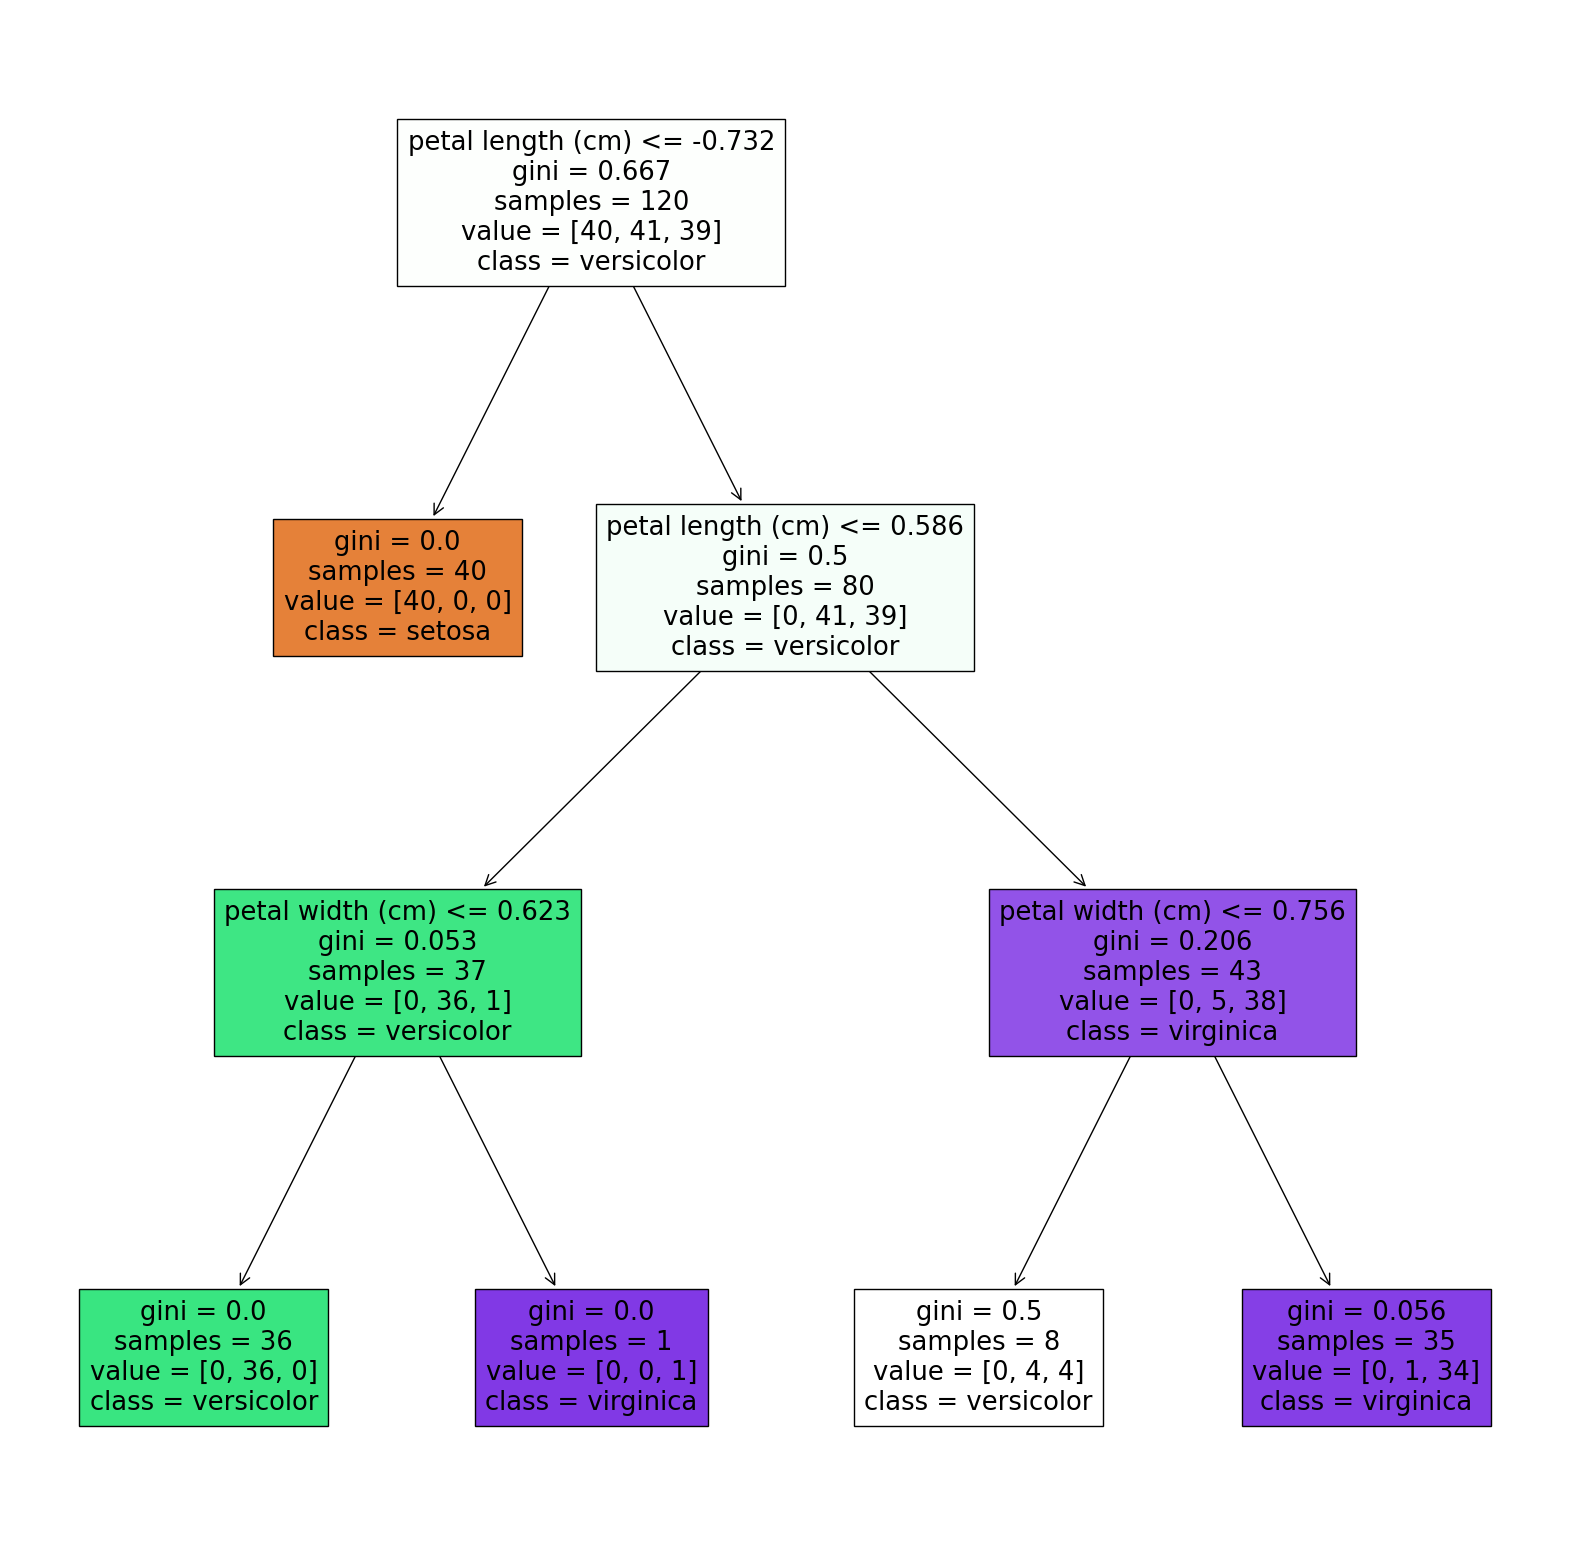

In [22]:
plt.figure(figsize=(20,20))
plot_tree(dt_model, feature_names= data.feature_names, class_names=data.target_names, filled=True)
plt.show()

In [23]:
print("The accuracy or the classification report of Decision_Tree model:\n", classification_report(y_test, dt_model.predict(X_test)))

The accuracy or the classification report of Decision_Tree model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='gini')

In [26]:
rf_model.fit(X_train, y_train)  # train the model

RandomForestClassifier(n_estimators=10)

In [27]:
print("The accuracy or the classification report of Random_Forest model:\n", classification_report(y_test, rf_model.predict(X_test)))

The accuracy or the classification report of Random_Forest model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



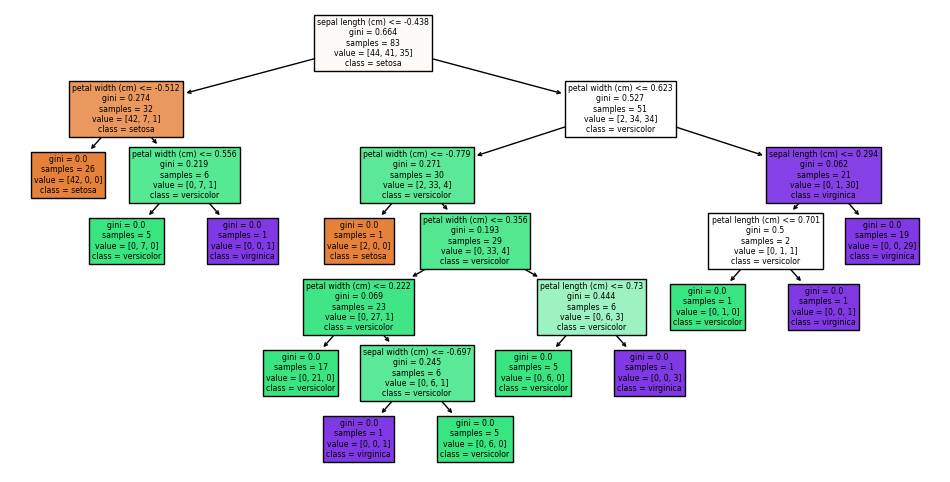

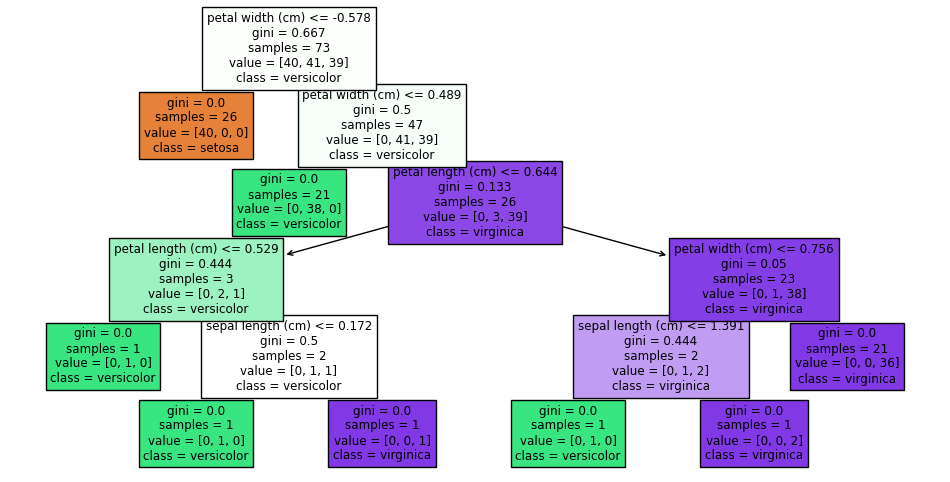

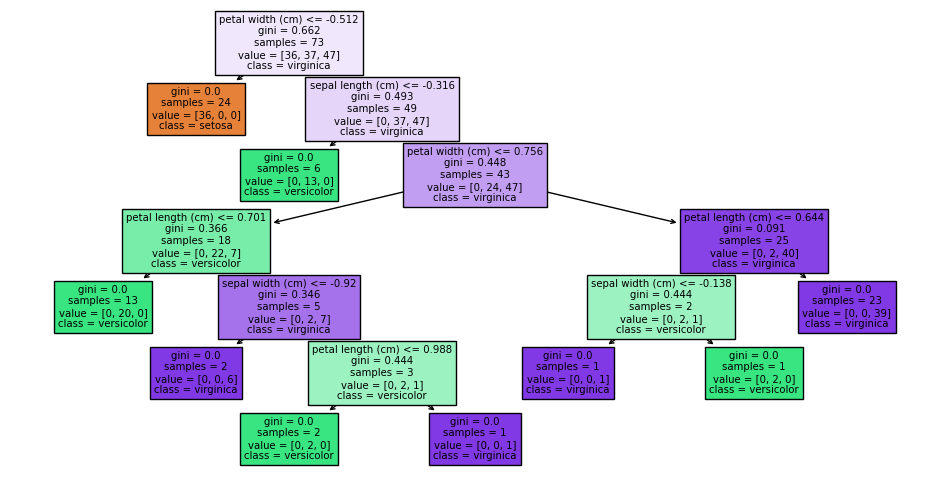

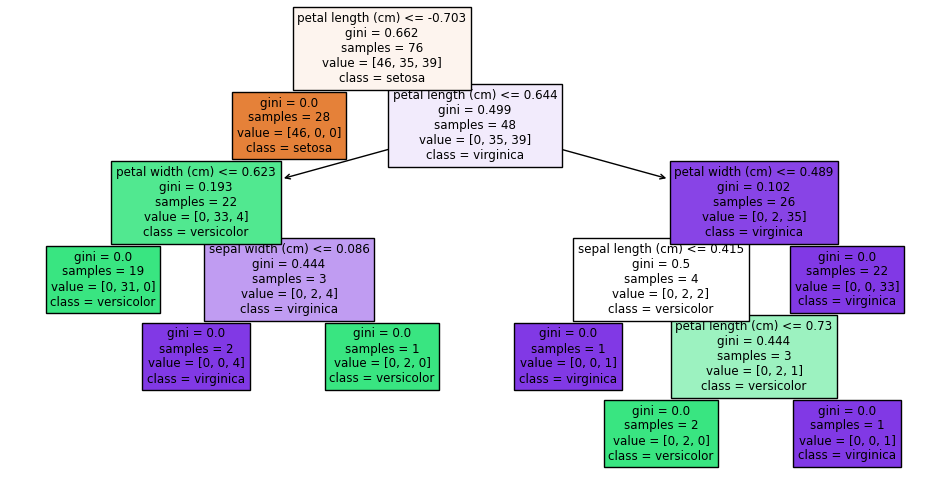

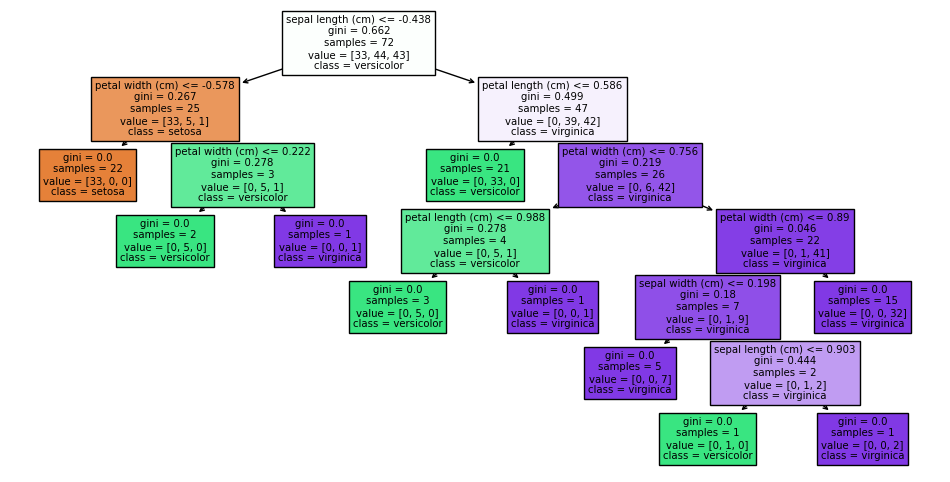

In [28]:
for i in range(min(5, len(rf_model.estimators_))):
    plt.figure(figsize=(12,6))
    plot_tree(rf_model.estimators_[i], feature_names= data.feature_names, class_names=data.target_names, filled=True)
    plt.show()

# Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [30]:
data = fetch_california_housing()

In [31]:
df1 = pd.DataFrame(data=data.data, columns=data.feature_names)
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [32]:
df1['target'] = data.target

In [33]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
df1.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [35]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
x = df1.drop(columns= ['target']) # drop target
y = df1['target']     

In [37]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [38]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10, test_size= 0.1)

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
x_train

array([[ 5.00775877e+00, -2.86646992e-01,  1.37332222e+00, ...,
        -4.67690450e-03,  8.96962621e-01, -1.37871267e+00],
       [-7.97277041e-01,  9.82927596e-01,  1.15153068e-02, ...,
         1.83532470e-01, -1.32717975e+00,  1.20858952e+00],
       [-1.03171978e+00,  7.44882361e-01, -4.17976340e-01, ...,
        -1.53569075e-01,  1.64614742e+00, -9.99839900e-01],
       ...,
       [ 8.73600987e-01, -1.79426682e+00, -2.08013881e-01, ...,
         1.15329171e-01,  7.89267306e-01, -1.10452843e+00],
       [-8.77195919e-01,  5.06837126e-01, -1.06849425e+00, ...,
         2.18958335e-01, -7.74655964e-01,  6.70191374e-01],
       [-6.29705200e-01, -1.00078270e+00, -5.87947250e-01, ...,
        -9.24043790e-02,  7.79902496e-01, -1.14939494e+00]])

In [42]:
x_test

array([[ 0.73928045, -1.31817634, -0.38328055, ...,  0.15067397,
        -0.69037267,  0.19660042],
       [ 0.05210437, -0.12795017, -0.32214014, ..., -0.134049  ,
         0.89696262, -1.36375716],
       [ 0.33474046, -1.31817634, -0.39909468, ..., -0.17521508,
        -0.91981052,  0.8995091 ],
       ...,
       [-1.09680184,  0.90357918,  0.19552012, ..., -0.06030158,
         2.87761994, -1.01978057],
       [ 0.79247201,  1.85576013,  0.5722117 , ..., -0.12994769,
         1.04211718, -1.33384615],
       [-0.9128148 , -0.60404064, -0.68556193, ..., -0.08083931,
        -0.89171609,  0.64028037]])

In [43]:
rf_model_reg = RandomForestRegressor(n_estimators= 100, criterion= 'squared_error', random_state= 30)

In [44]:
rf_model_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=30)

In [45]:
rf_model_reg.predict(x_test)

array([2.27082  , 3.7217202, 2.3208902, ..., 0.58726  , 3.4495506,
       2.2091   ])

In [46]:
r2_score(y_test, rf_model_reg.predict(x_test))

0.8192511838421583

In [47]:
mean_squared_error(y_test, rf_model_reg.predict(x_test))

0.2366957729676946

In [48]:
joblib.dump(rf_model_reg, "rf_model_reg.1000pkl")

['rf_model_reg.1000pkl']

### Warming: The dataset is huge so it takes more time to produce the tree  so i have commented it and took 20 rows and columns to produce the tree

In [49]:
# for i in range(min(5, len(rf_model_reg.estimators_))):
#     plt.figure(figsize=(12,6))
#     plot_tree(rf_model_reg.estimators_[i], feature_names= data.feature_names, class_names=data.target_names, filled=True)
#     plt.show()

In [50]:
x = df1.head(20).drop(columns= ['target']) # drop target
y = df1['target'][:20]   

In [51]:
# for i in range(min(5, len(rf_model_reg.estimators_))):
#     plt.figure(figsize=(12,6))
#     plot_tree(rf_model_reg.estimators_[i], feature_names= data.feature_names, class_names=data.target_names, filled=True)
#     plt.show()

# SVR_model

In [52]:
from sklearn.svm import SVR

In [53]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [54]:
x = df1.drop(columns= ['target']) # drop target
y = df1['target']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=20, test_size= 0.2)

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
x_train

array([[-0.72607026, -0.04991797, -0.74297851, ..., -0.06755839,
        -0.80067938,  0.71881493],
       [-0.32294264,  0.26728254, -0.08262282, ..., -0.0478457 ,
        -1.30699601,  1.18400647],
       [-0.04383809,  0.98098368, -0.61873843, ...,  0.01657471,
        -0.85224866,  0.67379639],
       ...,
       [ 0.30875381,  0.18798241,  0.2393005 , ..., -0.0507363 ,
        -1.32574847,  1.27404354],
       [ 1.00335669,  0.98098368, -0.06210756, ..., -0.10070777,
        -0.71629327,  0.64878609],
       [-0.08052913,  1.37748432, -0.41959532, ..., -0.1222071 ,
         1.01362187, -1.44207482]])

In [58]:
x_test

array([[-0.63689577, -0.28781835, -0.56627165, ...,  0.06177   ,
        -0.70222892,  0.8338623 ],
       [ 1.24350662, -1.71522064,  0.46470139, ...,  0.03087168,
         0.78859226, -1.10693682],
       [-0.97932789,  0.7430833 , -0.42895296, ..., -0.07569867,
         1.01830999, -1.3570398 ],
       ...,
       [ 0.1456182 , -1.47732026, -0.26756389, ..., -0.0442765 ,
        -0.15371924,  0.26862956],
       [ 0.91707749, -0.76361911,  0.59128705, ...,  0.00745361,
         0.76983979, -1.1469533 ],
       [-0.88715285, -1.08081962, -0.64735938, ..., -0.05762119,
        -0.79599126,  1.0689591 ]])

In [59]:
svr_regressor_model = SVR(kernel= 'rbf', C = 100, epsilon= 0.1)

In [60]:
svr_regressor_model.fit(x_train, y_train)

SVR(C=100)

In [61]:
svr_regressor_model.predict(x_test)

array([1.42366827, 2.71366427, 1.50963001, ..., 1.04299603, 2.72475753,
       1.33234261])

In [62]:
r2_score(y_test, svr_regressor_model.predict(x_test))

0.7764659563865223

In [63]:
df1.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
x_single_feature_train = x_train[:, 0].reshape(-1,1)  # taking only one feature i.e {MedInc} and converting rows into column for training purpose
x_single_feature_test = x_test[:,0].reshape(-1,1)  

In [65]:
x_single_feature_train

array([[-0.72607026],
       [-0.32294264],
       [-0.04383809],
       ...,
       [ 0.30875381],
       [ 1.00335669],
       [-0.08052913]])

In [66]:
x_single_feature_test


array([[-0.63689577],
       [ 1.24350662],
       [-0.97932789],
       ...,
       [ 0.1456182 ],
       [ 0.91707749],
       [-0.88715285]])

In [67]:
svr_regressor_model_single_column = SVR(kernel= 'poly', C = 100, epsilon= 0.1)

In [68]:
svr_regressor_model_single_column.fit(x_single_feature_train, y_train)

In [ ]:
y_pred_single = svr_regressor_model_single_column.predict(x_single_feature_test)

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(x_single_feature_test[:,0], y_test, color = 'red', label = 'Actual', alpha = 0.5) 
plt.scatter(x_single_feature_test[:,0], y_pred_single, color = 'blue', label = 'svr_prediction', alpha = 0.5) 